### Web Scraping Data from Jeets (Top 1500 Books Data)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# importing csv and converting to df
def create_df(filepath):
    df_all_books = pd.read_json(
        filepath,
        lines=True
    )
    # print(df_all_books.head(3))
    return pd.DataFrame(df_all_books[['title','description']])

In [8]:
def missing_vals(df):
    """
    Outputs missing values in dataframe & removes observations with missing values.
    Input:
    Output:
    """
    print(df.isna().sum())
    # removing rows
    df_clean = df.dropna()
    return df_clean

In [9]:
book_df_2 = create_df('/Users/priyanaaragula/CornellTech/ORIE5750_AML/AML-Project/book_best_books_001_015.jl')
print(book_df_2.head(10))
book_df_2.shape # ~1500 books in dataset

                         title  \
0             The Hunger Games   
1  Jonathan Livingston Seagull   
2            Lord of the Flies   
3             Romeo and Juliet   
4                     Stardust   
5                 Tao Te Ching   
6  The Hunchback of Notre-Dame   
7      The Things They Carried   
8        Because of Winn-Dixie   
9    Midnight Sun [2008 Draft]   

                                         description  
0  Could you survive on your own in the wild, wit...  
1  This is a story for people who follow their he...  
2  At the dawn of the next world war, a plane cra...  
3  In Romeo and Juliet, Shakespeare creates a vio...  
4  Alternate cover edition can be found hereYoung...  
5  A lucid translation of the well-known Taoist c...  
6  This extraordinary historical French gothic no...  
7  A classic work of American literature that has...  
8  The summer Opal and her father, the preacher, ...  
9  The record for the completed novel can be foun...  


(1500, 2)

In [10]:
book_df_2 = missing_vals(book_df_2)
book_df_2

title          1
description    2
dtype: int64


,title,description
0,The Hunger Games,"Could you survive on your own in the wild, wit..."
1,Jonathan Livingston Seagull,This is a story for people who follow their he...
2,Lord of the Flies,"At the dawn of the next world war, a plane cra..."
3,Romeo and Juliet,"In Romeo and Juliet, Shakespeare creates a vio..."
4,Stardust,Alternate cover edition can be found hereYoung...
...,...,...
1495,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...
1496,The Book Thief,Librarian's note: An alternate cover edition c...
1497,Pride and Prejudice,"Since its immediate success in 1813, Pride and..."
1498,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...


In [19]:
#book_df_2 = pd.DataFrame(book_df.drop(['Clean_text', 'String'], axis = 1))

# removing everything except alphabets`
book_df_2['Clean_text'] = book_df_2['description'].str.replace("[^a-zA-Z#]", " ")

# removing short words
book_df_2['Clean_text'] = book_df_2['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
book_df_2['Clean_text'] = book_df_2['Clean_text'].apply(lambda x: x.lower())

# tokenization
tokenized_doc = book_df_2['Clean_text'].apply(lambda x: x.split())

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
#detokenized_doc = []
#for i in range(len(book_df_2)):
#    t = ' '.join(tokenized_doc[i])
#    detokenized_doc.append(t)

#book_df_2['Clean_text'] = detokenized_doc

/var/folders/j1/1yf4p72d5qn097_6xdrl6cf00000gn/T/ipykernel_79697/3662290487.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  book_df_2['Clean_text'] = book_df_2['description'].str.replace("[^a-zA-Z#]", " ")


In [21]:
book_df_2['Clean_text']

0       could survive your wild with every make sure l...
1       this story people follow their hearts make the...
2       dawn next world plane crashes uncharted island...
3       romeo juliet shakespeare creates violent world...
4       alternate cover edition found hereyoung tristr...
                              ...                        
1495    unforgettable novel childhood sleepy southern ...
1496    librarian note alternate cover edition found h...
1497    since immediate success pride prejudice remain...
1498    harry potter about start fifth year hogwarts s...
1499    everyone something hide especially high school...
Name: Clean_text, Length: 1498, dtype: object

### Document-Matrix Creation (First step of LSA)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(book_df_2['Clean_text'])

X.shape # check shape of the document-term matrix

(1498, 1000)

###  The next step is to represent each and every term and document as a vector.  
#### We will use the document-term matrix and decompose it into multiple matrices. 
#### We will use sklearn’s TruncatedSVD to perform the task of matrix decomposition.  
#### The number of topics can be specified by using the n_components parameter. Trying aribtrary number of 15 topics


In [23]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=15, algorithm='randomized', n_iter=100, random_state=122)

#svd_model.fit(X)
X_topics = svd_model.fit_transform(X)

len(svd_model.components_)

15

### The components of svd_model are our topics
#### We can access them using svd_model.components_.  
#### Finally, print a few most important words in each of the 15 topics and see how our model has done.

In [24]:

terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])

Topic 0: 
life
world
love
story
novel
family
time
Topic 1: 
novel
edition
published
american
story
century
classic
Topic 2: 
love
family
story
life
novel
young
woman
Topic 3: 
edition
cover
alternate
isbn
note
love
librarian
Topic 4: 
book
children
little
school
stories
like
just
Topic 5: 
love
book
story
life
stories
york
read
Topic 6: 
family
story
years
children
cover
mother
alternate
Topic 7: 
king
harry
love
house
school
tale
tales
Topic 8: 
york
book
novel
times
city
author
bestselling
Topic 9: 
story
young
adventure
town
novel
woman
little
Topic 10: 
vampire
family
sookie
american
blood
vampires
undead
Topic 11: 
harry
world
year
school
vampire
summer
love
Topic 12: 
young
years
book
time
woman
beautiful
love
Topic 13: 
king
time
book
story
town
novel
love
Topic 14: 
novel
earth
house
time
night
little
ring


/Users/priyanaaragula/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Visualize data via clusters on graph

['abandoned', 'ability', 'able', 'academy', 'accident', 'acclaimed', 'account', 'action', 'actually', 'adam', 'adams', 'adult', 'adventure', 'adventures', 'affair', 'ages', 'alex', 'alien', 'alive', 'alternate', 'ambition', 'america', 'american', 'ancient', 'angel', 'angels', 'animals', 'anna', 'anne', 'answer', 'answers', 'apart', 'appears', 'army', 'arrives', 'arthur', 'artist', 'asks', 'assassin', 'astonishing', 'attempt', 'attention', 'attraction', 'author', 'award', 'away', 'baby', 'band', 'based', 'battle', 'beautiful', 'beauty', 'began', 'begin', 'beginning', 'begins', 'believe', 'believes', 'beloved', 'best', 'bestseller', 'bestselling', 'betrayal', 'better', 'birth', 'bizarre', 'black', 'blood', 'blue', 'body', 'bones', 'book', 'books', 'born', 'bound', 'boyfriend', 'boys', 'brave', 'break', 'breaking', 'brilliant', 'brilliantly', 'bring', 'brings', 'british', 'broken', 'brother', 'brothers', 'brought', 'brutal', 'buried', 'business', 'california', 'called', 'calls', 'came', '

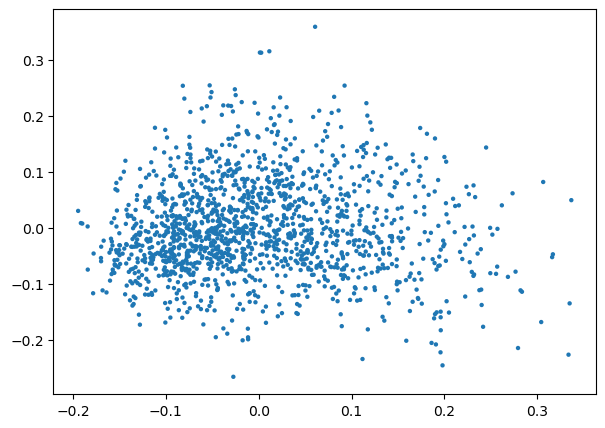

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Performed dimensionality reduction using TruncateSVD to obtain X_topics above.

# 2. Create an embedding using PCA
embedding = PCA(n_components=15, random_state=12).fit_transform(X_topics)

print(terms)

# 3. Visualize the embedding

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],s = 10, edgecolor='none')
plt.show()